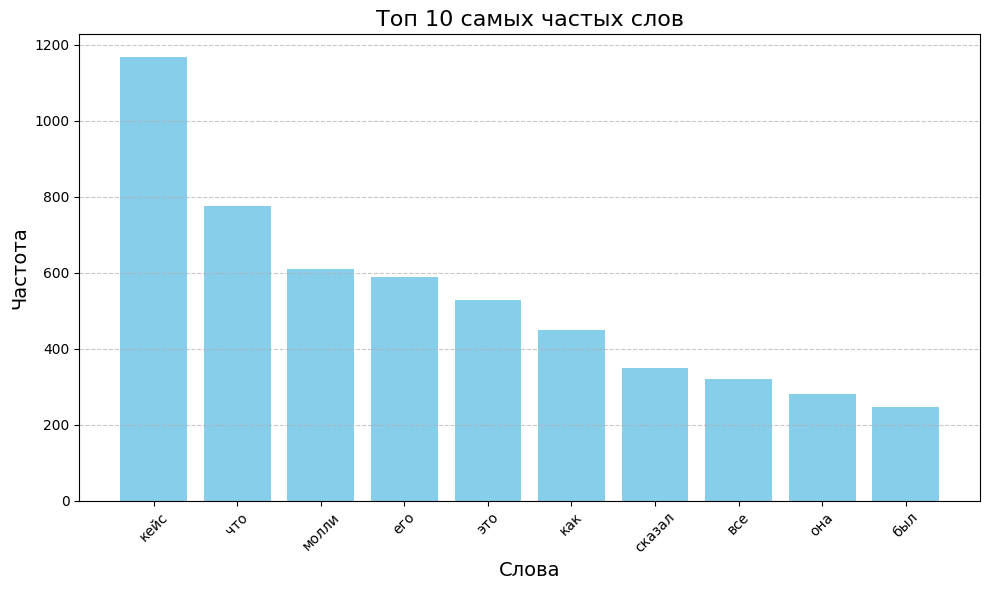

кейс: 1169
что: 776
молли: 610
его: 590
это: 529
как: 450
сказал: 350
все: 320
она: 280
был: 246


In [9]:
import bs4
import requests
from collections import Counter
import matplotlib.pyplot as plt
import re

# URL с текстом
url = "http://www.lib.ru/GIBSON/gibso01.txt"

# Запрос к URL
response = requests.get(url)
response.encoding = 'windows-1251'  # Используем кодировку - можете поменять на "koi8-r", а "utf-8" вообще не работает

# Парсинг текста
soup = bs4.BeautifulSoup(response.text, "lxml")
text = soup.get_text(' ', strip=True)

# Предобработка текста
text = text.lower()  # Приведение к нижнему регистру
text = re.sub(r'[^а-я\s]', '', text)  # Удаляем все, кроме русских букв и пробелов
words = text.split()  # Разделяем на слова

# Убираем слишком короткие слова (менее 3 символов)
words = [word for word in words if len(word) > 2]

# Подсчет слов
word_counts = Counter(words)

# 10 самых частых слов
common_words = word_counts.most_common(10)

# Распаковка данных для графика
words, counts = zip(*common_words)

# Построение гистограммы
plt.figure(figsize=(10, 6))
plt.bar(words, counts, color='skyblue')
plt.title("Топ 10 самых частых слов", fontsize=16)
plt.xlabel("Слова", fontsize=14)
plt.ylabel("Частота", fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Вывод результатов в консоль
for word, count in common_words:
    print(f"{word}: {count}")
